Import Dependencies

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

Data Collection

In [57]:
wine_data=pd.read_csv("/content/winequalityN.csv")

In [58]:
#print first five rows
wine_data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [59]:
#check null values
wine_data.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [60]:
wine_data["fixed acidity"].fillna(wine_data["fixed acidity"].mean(), inplace=True)
wine_data["volatile acidity"].fillna(wine_data["volatile acidity"].mean(), inplace=True)
wine_data["citric acid"].fillna(wine_data["citric acid"].mean(), inplace=True)
wine_data["residual sugar"].fillna(wine_data["residual sugar"].mean(), inplace=True)
wine_data["chlorides"].fillna(wine_data["chlorides"].mean(), inplace=True)
wine_data["pH"].fillna(wine_data["pH"].mean(), inplace=True)
wine_data["sulphates"].fillna(wine_data["sulphates"].mean(), inplace=True)

In [61]:
wine_data.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [62]:
wine_data.shape

(6497, 13)

Print statistics function

In [63]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.295751,0.164548,0.145231,4.757392,0.035031,17.749400,56.521855,0.002999,0.160637,0.148768,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


Data Analysis and Visualization

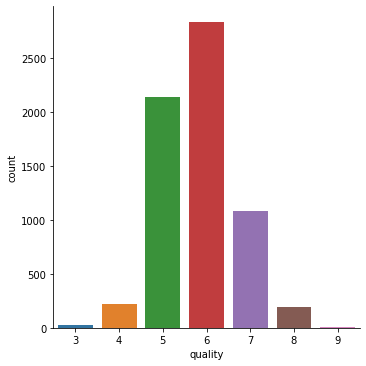

In [64]:
sns.catplot(x="quality", data=wine_data, kind="count")

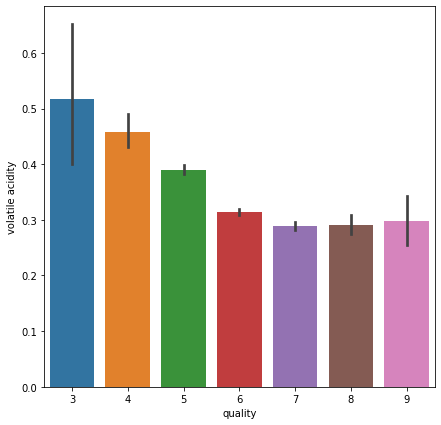

In [65]:
#Quality Vs Volitile acidity
plot=plt.figure(figsize=(7,7))
sns.barplot(x="quality", y="volatile acidity", data=wine_data)

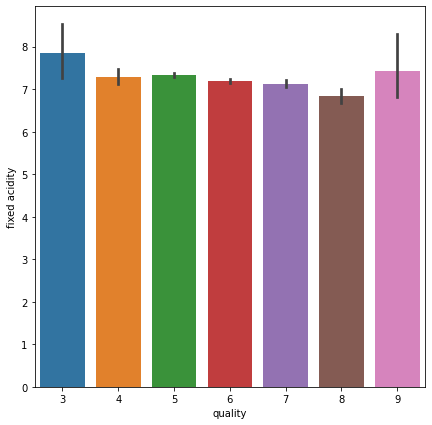

In [66]:
#Quality Vs Fixed Acidity
plot=plt.figure(figsize=(7,7))
sns.barplot(x="quality", y="fixed acidity", data=wine_data)



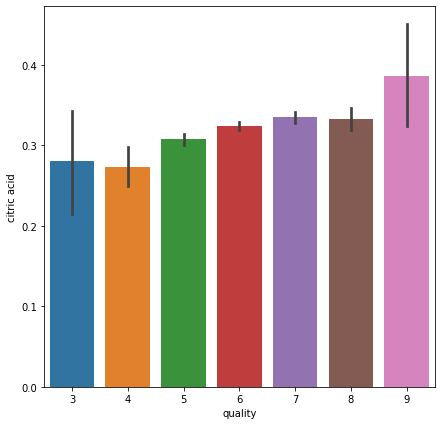

In [67]:
#quality Vs citric acid
plot=plt.figure(figsize=(7,7))
sns.barplot(x="quality", y="citric acid", data=wine_data)

In [68]:
#correlation
correlation=wine_data.corr()


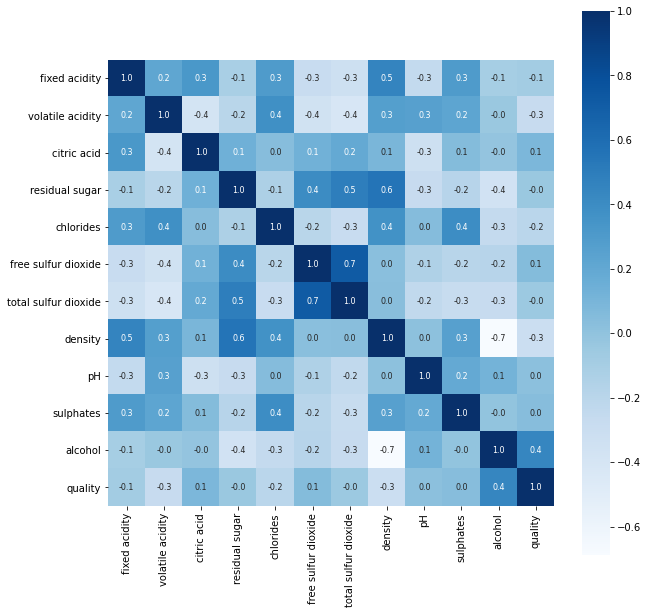

In [69]:
#print heatmap
plot=plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True, square=True, fmt=".1f",annot=True, annot_kws={"size":8},cmap="Blues")

In [70]:
wine_data.shape

(6497, 13)

In [71]:
x=wine_data.drop(columns="quality", axis=1)

In [72]:
print(x)

       type  fixed acidity  volatile acidity  ...    pH  sulphates  alcohol
0     white            7.0             0.270  ...  3.00   0.450000      8.8
1     white            6.3             0.300  ...  3.30   0.490000      9.5
2     white            8.1             0.280  ...  3.26   0.440000     10.1
3     white            7.2             0.230  ...  3.19   0.400000      9.9
4     white            7.2             0.230  ...  3.19   0.400000      9.9
...     ...            ...               ...  ...   ...        ...      ...
6492    red            6.2             0.600  ...  3.45   0.580000     10.5
6493    red            5.9             0.550  ...  3.52   0.531215     11.2
6494    red            6.3             0.510  ...  3.42   0.750000     11.0
6495    red            5.9             0.645  ...  3.57   0.710000     10.2
6496    red            6.0             0.310  ...  3.39   0.660000     11.0

[6497 rows x 12 columns]


In [73]:
x_values=x.drop(columns="type",axis=1)

In [74]:
print(x_values)

      fixed acidity  volatile acidity  citric acid  ...    pH  sulphates  alcohol
0               7.0             0.270         0.36  ...  3.00   0.450000      8.8
1               6.3             0.300         0.34  ...  3.30   0.490000      9.5
2               8.1             0.280         0.40  ...  3.26   0.440000     10.1
3               7.2             0.230         0.32  ...  3.19   0.400000      9.9
4               7.2             0.230         0.32  ...  3.19   0.400000      9.9
...             ...               ...          ...  ...   ...        ...      ...
6492            6.2             0.600         0.08  ...  3.45   0.580000     10.5
6493            5.9             0.550         0.10  ...  3.52   0.531215     11.2
6494            6.3             0.510         0.13  ...  3.42   0.750000     11.0
6495            5.9             0.645         0.12  ...  3.57   0.710000     10.2
6496            6.0             0.310         0.47  ...  3.39   0.660000     11.0

[6497 rows x 11

Label Binarization

In [75]:
y=wine_data["quality"].apply(lambda y_values: 1 if y_values >=7 else 0)


In [79]:
print(y)


0       0
1       0
2       0
3       0
4       0
       ..
6492    0
6493    0
6494    0
6495    0
6496    0
Name: quality, Length: 6497, dtype: int64


Value counts

In [80]:
y.value_counts()

0    5220
1    1277
Name: quality, dtype: int64

0-> bad Quality
1-> Good Quality

In [81]:
#train and test
x_train,x_test,y_train,y_test=train_test_split(x_values,y, test_size=0.2, random_state=3)

In [82]:
print(x_train.shape, x_test.shape)

(5197, 11) (1300, 11)


Train the model

In [83]:
classifier=RandomForestClassifier()
classifier.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Model Accuracy Score

In [84]:
x_test_prediction=classifier.predict(x_test)
x_test_accuracy=accuracy_score(x_test_prediction,y_test)

In [85]:
print("An Accuracy of the model", x_test_accuracy)

An Accuracy of the model 0.8861538461538462


Build the predictive System

In [87]:
input_data=(6.6,0.16,0.4,1.5,0.044,48,143,0.9912,3.54,0.52,12.4)

#converting input data into numpy array

input_data_numpy=np.asarray(input_data)

#reshaped the numpy converted array

input_data_reshaped=input_data_numpy.reshape(1,-1)

prediction=classifier.predict(input_data_reshaped)

print(prediction)

if(prediction[0]==1):
  print("Good quality wine")

else:
  print("Bad quality wine")

[1]
Good quality wine
